# Is Fandango Still Inflating Ratings?
* This project is about checking movie ratings on Fandango after this article was published
* The goal is to verify if any changes were made after the article was published

# Understanding the Data

In [3]:
import pandas as pd
pd.options.display.max_columns = 100 # prevent truncation
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
previous.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
after.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
fandango_previous = previous[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy() # make a copy based on this stackoverflow: https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe from this google search: select columns from dataframe pandas 

In [7]:
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [8]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [9]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


The population are all the ratings stored on Fandango's website.  We are comparing the ratings before and after the article

The file for the fandango_score_comparison.csv has the following criteria to be included:
* Contains every film that has a Rotten Tomatoes rating, 
* a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and **at least 30 fan reviews on Fandango.** 

The data from Fandango was pulled on Aug. 24, 2015.

For the movie_ratings_16_17.csv has the following criteria to be included: contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date **From the readme**

This means that for both of these datasets that sampling was not random (if data did not meet the specific criteria required they were excluded)

# Changing the Goal of our Analysis

Collecting new data is not useful because that takes time and is unnecessary.  In this case we will change the goal to check ratings for a specific year before and after the article was published

We will change our focus to fandango movie ratings for popular movies in 2015 compared to ratings for popular movies in 2016 and see if there is any difference.  This allows for a more focused analysis for the initial goal

# Isolating the Samples We Need

Popular movies are movies that have 30 or more fan ratings

In [10]:
fandango_after.sample(10,random_state = 1) # Sample 10 movies and verify ratings

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Using 1 for the random seed shows that we aren't just trying to get data that matches what we want

Fan Ratings on Fandango as of April 2018 (This is provided from dataquest)

|Movie|Fan Ratings|
|-----|-----------|
|Mechanic: Ressurection|2247|
|Warcraft|7271|
|Max Steel|493|
|Fantastic Beasts and Where to Find Them|13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King|500|
|Captain America: Civil War|35057|

Based on the threshold all the movies except for cell are popular so now we have a more confident data set for after the article.

Checking the previous dataset gives the following:

In [11]:
sum(fandango_previous['Fandango_votes'] < 30) # True values are equal to 1

0

In [12]:
previous.head(10) # Not all movies were released in 2015

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,2.50,3.40,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,2.65,3.80,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,4.05,3.40,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,4.05,4.40,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,4.00,4.25,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [13]:
film1 = fandango_previous['FILM'].iloc[0] # Get the first value from the new dataset using this stackoverflow: https://stackoverflow.com/questions/25254016/pandas-get-first-row-value-of-a-given-column from this google search: get first entry in first row pandas 

In [14]:
film1 # get the value

'Avengers: Age of Ultron (2015)'

In [15]:
film1[-1] # testing get last value

')'

In [16]:
year = film1[-5:-1]
print(year)

2015


In [17]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1] # apply string operations to series

In [18]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [19]:
fandango_previous['Year'].value_counts() # Get the years for each movie in the previous dataset

2015    129
2014     17
Name: Year, dtype: int64

In this dataset there are 129 movies from 2015 and 17 movies from 2014 and we **only want movies from 2015**

In [20]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now let's isolate movies from 2016 from the other dataset

In [21]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [22]:
fandango_after['year'].dtype

dtype('int64')

In [23]:
fandango_previous['Year'].dtype

dtype('O')

In [24]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

In [25]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

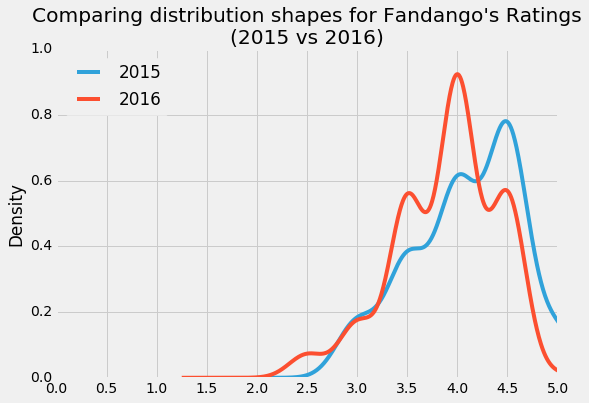

In [26]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's Ratings\n(2015 vs 2016)")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

Both distributions are left skewed (with 2016 slightly shifted to the left then 2015).  Also it is noted that fandango tends to give very high ratings and fan ratings (because they sell tickets).  Also based on the graph the direction for 2016 is slightly lower compared to 2015.

# Comparing Relative Frequencies

The plots show a general trend but freqnecy tables will allow more granular information

In [29]:
print('2015' + '\n' + '-' * 16) # Generate a header
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [30]:
print('2016' + '\n' + '-' * 16) # Generate a header
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Ratings of 4.5 and 5.0 were down in 2016 compared to 2015 and less that 1 % of movies had the perfect score of 5.0.  Furthermore, 2015 had more 4.5 rated movies (38%) compared to 24.6% in 2016.  The minimum rating in 2016 was 2.5 compared to 3.0 in 2015 but there were increases in movies rated 3.5 and 4.0 from 2015 to 2016.  The increase in ratings of 3.5 and 4.0 movies challenges the direction observed in the kernal density plots

# Determining the Direction of Change

In [36]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

# Generate summary dataframe
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


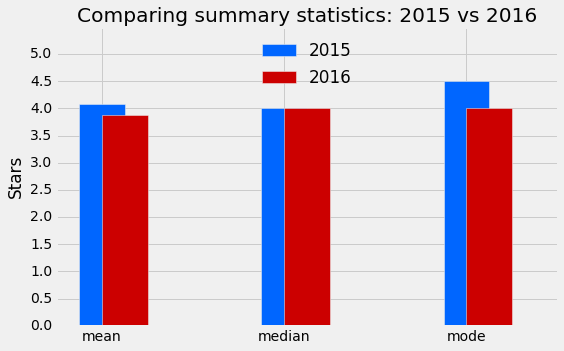

In [41]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = 0.25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = 0.25, rot = 0, figsize=(8,5))
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [42]:
summary.loc['mean'] # mean

2015    4.085271
2016    3.887435
Name: mean, dtype: float64

In [43]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

In [44]:
((summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]) * 100 # Percent difference

4.842683568951993

The mode is lower by 0.5 in 2016 compared to 2015 and the mean has a 4.84 % decrease from 2015 to 2016

# Conclusion

The analysis shows that there is difference in ratings for popular movies between 2015 and 2016.  On average, ratings were lower for popular movies in 2016 compared to 2015.  

Perhaps the article in question caused the change